# VariantMetaCaller test

## With previously tested germline callers

The VCF files of four germline callers presented in Gézsi et al 2015 were obtained from the authors.  The run of VMC with these input VCFs was successful. See `2018-06-22-variant-meta-caller-test/vmc-prioritize-testvcf-germline` directory

## With our somatic callers


In [3]:
library(lattice)
lattice.options(default.args = list(as.table = TRUE))

In [4]:
gt <- read.delim("~/projects/bsm/results//2018-06-22-variant-meta-caller-test/vmc-prioritize-benchmark/test08//strelka2Somatic.tsv")
str(gt)

'data.frame':	21152 obs. of  18 variables:
 $ Ref         : Factor w/ 4 levels "A","C","G","T": 4 3 1 1 2 1 2 2 2 2 ...
 $ Alt         : Factor w/ 4 levels "A","C","G","T": 2 2 3 2 1 3 4 4 4 4 ...
 $ Normal.DP   : int  83 88 90 64 64 80 93 120 66 64 ...
 $ Normal.FDP  : int  1 2 0 0 0 1 0 2 0 6 ...
 $ Normal.SDP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Normal.SUBDP: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Normal.AU   : int  0 0 90 64 0 79 0 0 0 0 ...
 $ Normal.CU   : int  0 0 0 0 64 0 92 118 66 58 ...
 $ Normal.GU   : int  0 86 0 0 0 0 1 0 0 0 ...
 $ Normal.TU   : int  82 0 0 0 0 0 0 0 0 0 ...
 $ Tumor.DP    : int  151 130 118 94 92 93 84 141 89 93 ...
 $ Tumor.FDP   : int  1 1 1 1 0 2 1 1 0 7 ...
 $ Tumor.SDP   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor.SUBDP : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor.AU    : int  0 0 99 78 9 78 0 0 0 0 ...
 $ Tumor.CU    : int  9 33 1 15 83 0 62 116 76 73 ...
 $ Tumor.GU    : int  0 96 17 0 0 13 0 0 0 0 ...
 $ Tumor.TU    : int  141 0 0 0 0 0 21 24 13 13 ...


In [5]:
get.vaf <- function(df) {
    get.allele.count <- function(allele = c("Ref", "Alt")[1], sample = c("Normal", "Tumor")[1])
        return(as.numeric(df[cbind(seq_len(nrow(df)), as.numeric(df[[allele]]) + ifelse(sample == "Normal", 6, 14))]))
    get.depth <- function(sample = c("Normal", "Tumor")[1])
        return(as.numeric(df[cbind(seq_len(nrow(df)), ifelse(sample == "Normal", 3, 11))]))
    Normal.DP <- get.depth("Normal")
    Tumor.DP <- get.depth("Tumor")
    rbind(data.frame(Sample = "Normal",
                     Ref.VAF = get.allele.count("Ref", "Normal") / Normal.DP,
                     Alt.VAF = get.allele.count("Alt", "Normal") / Normal.DP),
          data.frame(Sample = "Tumor",
                     Ref.VAF = get.allele.count("Ref", "Tumor") / Tumor.DP,
                     Alt.VAF = get.allele.count("Alt", "Tumor") / Tumor.DP))
}

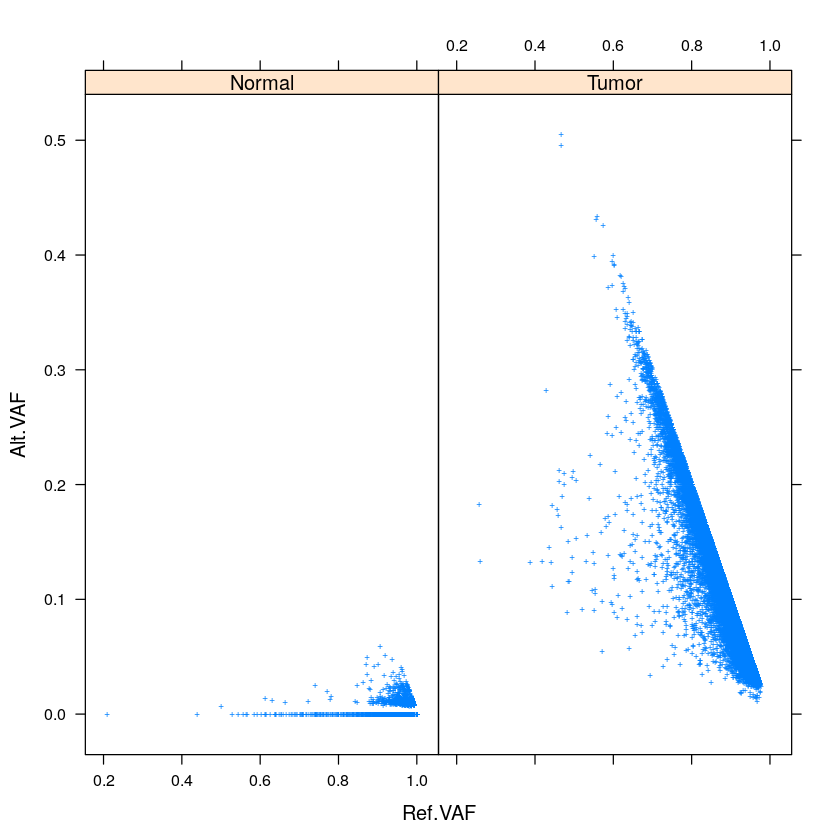

In [6]:
xyplot(Alt.VAF ~ Ref.VAF | Sample, data = get.vaf(gt), pch = "+")